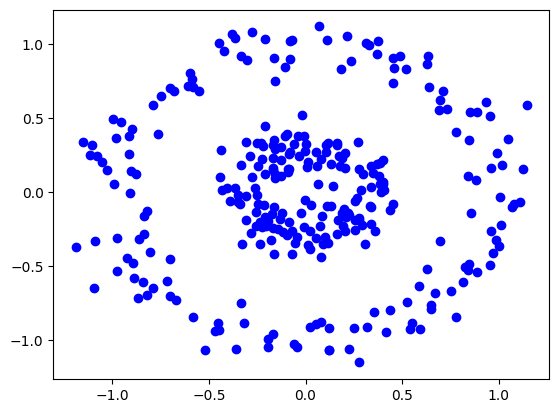

In [4]:
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

noisy_circles, _ = datasets.make_circles(
    n_samples=300, noise=0.1, factor=0.3, random_state=10
)

plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], color="b")

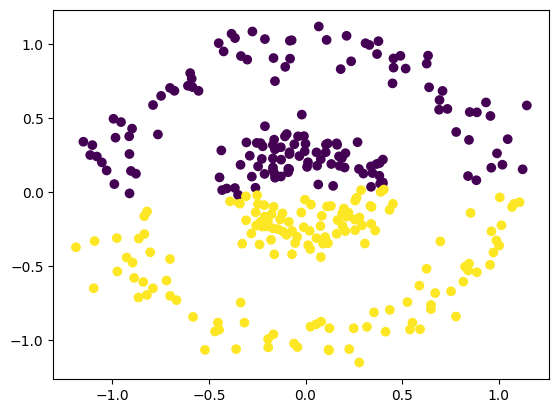

In [5]:
from sklearn.cluster import KMeans

# 尝试使用 k-means 划分来进行聚类
plt.scatter(
    noisy_circles[:, 0],
    noisy_circles[:, 1],
    c=KMeans(n_clusters=2, n_init="auto").fit_predict(noisy_circles),
)

In [6]:
import numpy as np

 # 基于 k-近邻 计算邻接矩阵
def knn_similarity_matrix(data, k):
    # 建立 n x n 0 矩阵
    zero_matrix = np.zeros((len(data), len(data)))
    w = np.zeros((len(data), len(data)))

    # 0 ~ n，分别计算两两间的欧氏距离，并且进行对称存储
    for i in range(len(data)):
        # 1 ~ n
        # 2 ~ n
        for j in range(i + 1, len(data)):
            zero_matrix[i][j] = zero_matrix[j][i] = np.linalg.norm(
                data[i] - data[j]
            )  # 计算欧式距离
    # 为每个点选择其 k 个最近邻
    for i, vector in enumerate(zero_matrix):
        vector_i = np.argsort(vector)
        w[i][vector_i[1 : k + 1]] = 1

    # 将两点间权重相加求平均
    # transpose 转置？
    w = (np.transpose(w) + w) / 2

    return w

In [10]:
def spectral_clustering(data, k, n):
    # 计算邻接矩阵
    A_matrix = knn_similarity_matrix(data, k)

    # 计算度矩阵
    D_matrix = np.diag(np.power(np.sum(A_matrix, axis=1), -0.5))

    # 计算拉普拉斯矩阵
    L_matrix = np.eye(len(data)) - np.dot(np.dot(D_matrix, A_matrix), D_matrix)

    # 计算特征值和特征向量
    eigvals, eigvecs = np.linalg.eig(L_matrix)

    # 选择前 n 个最小的特征向量
    indices = np.argsort(eigvals)[:n]
    k_eigenvectors = eigvecs[:, indices]
    k_eigenvectors

    # 使用 K-Means 完成聚类
    clusters = KMeans(n_clusters=n, n_init="auto").fit_predict(k_eigenvectors)

    return clusters

In [8]:
sc_clusters = spectral_clustering(noisy_circles, k=5, n=2)
sc_clusters

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

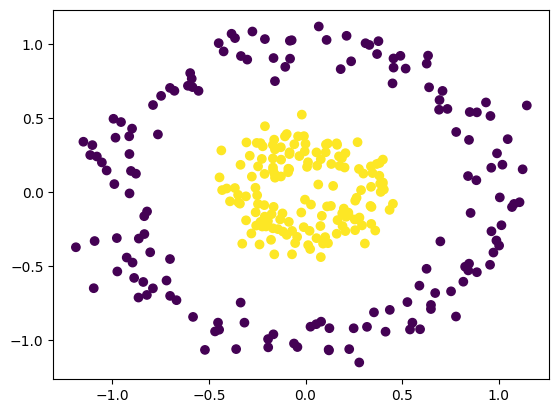

In [9]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=sc_clusters)

In [3]:
# sklearn.cluster.SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, metric='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)

# - n_clusters：聚类簇数量。
# - eigen_solver：特征值求解器。
# - gamma：affinity 使用核函数时的核函数系数。
# - affinity：邻接矩阵计算方法，可选择核函数、k-近邻等。
# - n_neighbors：邻接矩阵选择 k-近邻法时的 k 值。
# - assign_labels：最终聚类方法，默认为 K-Means。

In [11]:
# 生成 100px * 100px 的图像
l = 100
x, y = np.indices((l, l))
# 在图像中添加 4 个圆
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)
radius1, radius2, radius3, radius4 = 16, 14, 15, 14
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)
# 添加随机噪声点
img += 1 + 0.2 * np.random.randn(*img.shape)

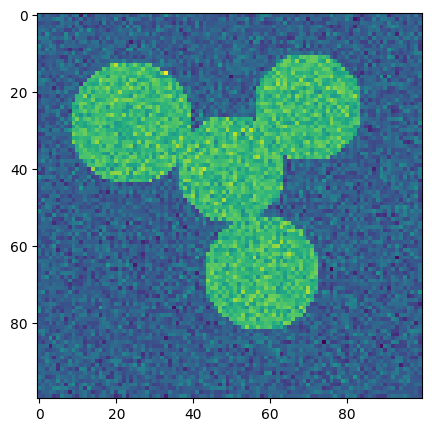

In [12]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

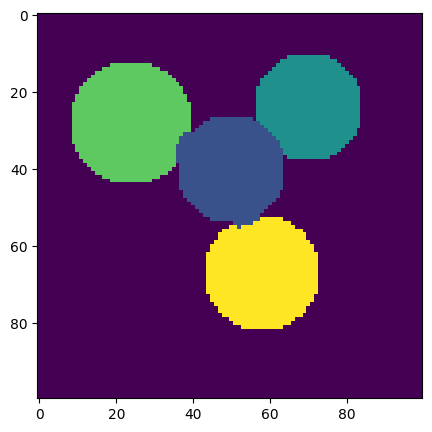

In [13]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

graph = image.img_to_graph(img, mask=mask)  # 图像处理为梯度矩阵
graph.data = np.exp(-graph.data / graph.data.std())  # 正则化

labels = spectral_clustering(graph, n_clusters=4)
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.figure(figsize=(5, 5))
plt.imshow(label_im)